In [49]:
library(haven)
library(tidyverse)
library(mlbench)
library(MASS)
library(pROC)
library(ResourceSelection)
library(DescTools)
library(survey)
library(corrplot)
library(vcd)

In [48]:
install.packages('vcd')

Installing package into 'C:/Users/Jaswinder Singh/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'vcd' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Jaswinder Singh\AppData\Local\Temp\RtmpEHipX6\downloaded_packages


In [3]:
elec_df <- read.csv('C:/Users/Jaswinder Singh/Downloads/Statistics/Data/Logistic Regression/Election_final2.csv')

In [4]:
head(elec_df)

,LANGUAGE,Support_Trump,Support_Clinton,Age_Category,Sex,Education_Category,Education_Category2,Hispanic,Combining_Race,Race_Ethinicity,Marital_status,Religion,Party,Income,Income_Recode,Ideology,Insurance_Status,Internet_frequency,Social_media_user
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,English,1,Yes,65+,Female,Some college,"Some college, no degree",No,White,White non-Hispanic,Divorced,Roman Catholic,Democrat,"20 to under $30,000","<$30,000",Moderate,Covered by health insurance,Every day,Social Media Users
2,English,0,No,30-49,Male,Some college,Associate? degree,No,White,White non-Hispanic,Married,Protestant,Independent,"50 to under $75,000","$30-$74,999",Moderate,Covered by health insurance,At least once a week but not every day,Social Media Users
3,English,1,Yes,50-64,Female,College graduate+,College graduate/some postgrad,No,White,White non-Hispanic,Married,Jewish,Republican,"100 to under $150,000 [OR]","$75,000+",Conservative,Covered by health insurance,Every day,Social Media Users
4,English,1,Yes,50-64,Male,College graduate+,Postgraduate,No,White,White non-Hispanic,Married,Roman Catholic,Republican,"100 to under $150,000 [OR]","$75,000+",Conservative,Covered by health insurance,Every day,Social Media Users
5,English,1,Yes,50-64,Male,College graduate+,Postgraduate,No,White,White non-Hispanic,Married,Protestant,Democrat,"75 to under $100,000","$75,000+",Moderate,Covered by health insurance,Every day,Social Media Users
6,English,0,Yes,50-64,Male,College graduate+,College graduate/some postgrad,No,White,White non-Hispanic,Married,Protestant,Democrat,"$150,000 or more","$75,000+",Very liberal,Covered by health insurance,Every day,Social Media Users


In [5]:
str(elec_df)

'data.frame':	2829 obs. of  19 variables:
 $ LANGUAGE           : chr  "English" "English" "English" "English" ...
 $ Support_Trump      : int  1 0 1 1 1 0 1 0 0 1 ...
 $ Support_Clinton    : chr  "Yes" "No" "Yes" "Yes" ...
 $ Age_Category       : chr  "65+" "30-49" "50-64" "50-64" ...
 $ Sex                : chr  "Female" "Male" "Female" "Male" ...
 $ Education_Category : chr  "Some college" "Some college" "College graduate+" "College graduate+" ...
 $ Education_Category2: chr  "Some college, no degree" "Associate? degree" "College graduate/some postgrad" "Postgraduate" ...
 $ Hispanic           : chr  "No" "No" "No" "No" ...
 $ Combining_Race     : chr  "White" "White" "White" "White" ...
 $ Race_Ethinicity    : chr  "White non-Hispanic" "White non-Hispanic" "White non-Hispanic" "White non-Hispanic" ...
 $ Marital_status     : chr  "Divorced" "Married" "Married" "Married" ...
 $ Religion           : chr  "Roman Catholic" "Protestant" "Jewish" "Roman Catholic" ...
 $ Party            

In [6]:
is.factor(elec_df$Age_Category)

[1] FALSE

In [8]:
elec_df$LANGUAGE <- as.factor(elec_df$LANGUAGE)
elec_df$Support_Trump <- as.factor(elec_df$Support_Trump)
elec_df$Support_Clinton <- as.factor(elec_df$Support_Clinton)
elec_df$Age_Category <- as.factor(elec_df$Age_Category)
elec_df$Sex <- as.factor(elec_df$Sex)
elec_df$Education_Category <- as.factor(elec_df$Education_Category2)
elec_df$Hispanic <- as.factor(elec_df$Hispanic)
elec_df$Combining_Race <- as.factor(elec_df$Combining_Race)
elec_df$Race_Ethinicity <- as.factor(elec_df$Race_Ethinicity)
elec_df$Marital_status <- as.factor(elec_df$Marital_status)
elec_df$Religion <- as.factor(elec_df$Religion)
elec_df$Party <- as.factor(elec_df$Party)
elec_df$Income <- as.factor(elec_df$Income)
elec_df$Income_Recode <- as.factor(elec_df$Income_Recode)
elec_df$Ideology <- as.factor(elec_df$Ideology)
elec_df$Insurance_Status <- as.factor(elec_df$Insurance_Status)
elec_df$Internet_frequency <- as.factor(elec_df$Internet_frequency)
elec_df$Social_media_user <- as.factor(elec_df$Social_media_user)
elec_df$Education_Category2 <- as.factor(elec_df$Education_Category2)

In [9]:
str(elec_df)

'data.frame':	2829 obs. of  19 variables:
 $ LANGUAGE           : Factor w/ 2 levels "English","Spanish": 1 1 1 1 1 1 1 1 1 1 ...
 $ Support_Trump      : Factor w/ 2 levels "0","1": 2 1 2 2 2 1 2 1 1 2 ...
 $ Support_Clinton    : Factor w/ 3 levels "99","No","Yes": 3 2 3 3 3 3 3 3 3 3 ...
 $ Age_Category       : Factor w/ 4 levels "18-29","30-49",..: 4 2 3 3 3 3 2 4 4 4 ...
 $ Sex                : Factor w/ 2 levels "Female","Male": 1 2 1 2 2 2 2 2 2 1 ...
 $ Education_Category : Factor w/ 6 levels "Associate? degree",..: 6 1 2 5 5 2 2 5 5 5 ...
 $ Education_Category2: Factor w/ 6 levels "Associate? degree",..: 6 1 2 5 5 2 2 5 5 5 ...
 $ Hispanic           : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ Combining_Race     : Factor w/ 5 levels "Asian or Asian-American",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ Race_Ethinicity    : Factor w/ 4 levels "Black non-Hispanic",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Marital_status     : Factor w/ 6 levels "Divorced","Living with a partner",..: 1 3 3 3

In [19]:
unique(elec_df$Social_media_user)

[1] Social Media Users     Not Social Media Users
Levels: Not Social Media Users Social Media Users

In [20]:
elec_df2 <- elec_df

In [21]:
keeps <- c("Support_Trump", "Age_Category", "Sex", "Education_Category", 
           "Hispanic", "Combining_Race", "Race_Ethinicity", "Marital_status", "Religion	Party",
           "Income", "Income_Recode", "Ideology", "Insurance_Status","Internet_frequency","Social_media_user")
drop <- c("LANGUAGE","Support_Clinton", "Education_Category2")
elec_df3 = elec_df2[,!(names(elec_df2) %in% drop)]
head(elec_df3)

,Support_Trump,Age_Category,Sex,Education_Category,Hispanic,Combining_Race,Race_Ethinicity,Marital_status,Religion,Party,Income,Income_Recode,Ideology,Insurance_Status,Internet_frequency,Social_media_user
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1,65+,Female,"Some college, no degree",No,White,White non-Hispanic,Divorced,Roman Catholic,Democrat,"20 to under $30,000","<$30,000",Moderate,Covered by health insurance,Every day,Social Media Users
2,0,30-49,Male,Associate? degree,No,White,White non-Hispanic,Married,Protestant,Independent,"50 to under $75,000","$30-$74,999",Moderate,Covered by health insurance,At least once a week but not every day,Social Media Users
3,1,50-64,Female,College graduate/some postgrad,No,White,White non-Hispanic,Married,Jewish,Republican,"100 to under $150,000 [OR]","$75,000+",Conservative,Covered by health insurance,Every day,Social Media Users
4,1,50-64,Male,Postgraduate,No,White,White non-Hispanic,Married,Roman Catholic,Republican,"100 to under $150,000 [OR]","$75,000+",Conservative,Covered by health insurance,Every day,Social Media Users
5,1,50-64,Male,Postgraduate,No,White,White non-Hispanic,Married,Protestant,Democrat,"75 to under $100,000","$75,000+",Moderate,Covered by health insurance,Every day,Social Media Users
6,0,50-64,Male,College graduate/some postgrad,No,White,White non-Hispanic,Married,Protestant,Democrat,"$150,000 or more","$75,000+",Very liberal,Covered by health insurance,Every day,Social Media Users


In [24]:
LR_Model1 <- glm(Support_Trump ~ Age_Category + Sex + Education_Category + Race_Ethinicity + Religion + Party  
                 + Marital_status + Combining_Race + Ideology, data = elec_df,
          family=binomial(link = 'logit'))

In [28]:
LR_Model2 <- glm(Support_Trump ~ Sex + Education_Category + Party  
                  + Income_Recode + Combining_Race + Ideology, data = elec_df,
          family=binomial(link = 'logit'))

In [26]:
summary(LR_Model1)


Call:
glm(formula = Support_Trump ~ Age_Category + Sex + Education_Category + 
    Race_Ethinicity + Religion + Party + Marital_status + Combining_Race + 
    Ideology, family = binomial(link = "logit"), data = elec_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6046  -0.9177   0.4375   0.8164   2.3576  

Coefficients:
                                                  Estimate Std. Error z value
(Intercept)                                      -1.309227   1.034743  -1.265
Age_Category30-49                                -0.062757   0.175956  -0.357
Age_Category50-64                                 0.028173   0.179740   0.157
Age_Category65+                                  -0.010415   0.191455  -0.054
SexMale                                           0.380942   0.097462   3.909
Education_CategoryCollege graduate/some postgrad -0.245400   0.183173  -1.340
Education_CategoryHigh school graduate           -0.325853   0.219816  -1.482
Education_CategoryLess tha

In [29]:
summary(LR_Model2)


Call:
glm(formula = Support_Trump ~ Sex + Education_Category + Party + 
    Income_Recode + Combining_Race + Ideology, family = binomial(link = "logit"), 
    data = elec_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5179  -0.9678   0.4557   0.8233   2.0857  

Coefficients:
                                                  Estimate Std. Error z value
(Intercept)                                       0.226799   0.333109   0.681
SexMale                                           0.349760   0.093726   3.732
Education_CategoryCollege graduate/some postgrad -0.224990   0.181254  -1.241
Education_CategoryHigh school graduate           -0.260426   0.217155  -1.199
Education_CategoryLess than high school          -0.868568   0.335123  -2.592
Education_CategoryPostgraduate                   -0.369016   0.185655  -1.988
Education_CategorySome college, no degree        -0.002214   0.188166  -0.012
PartyIndependent                                  0.532190   0.112907  

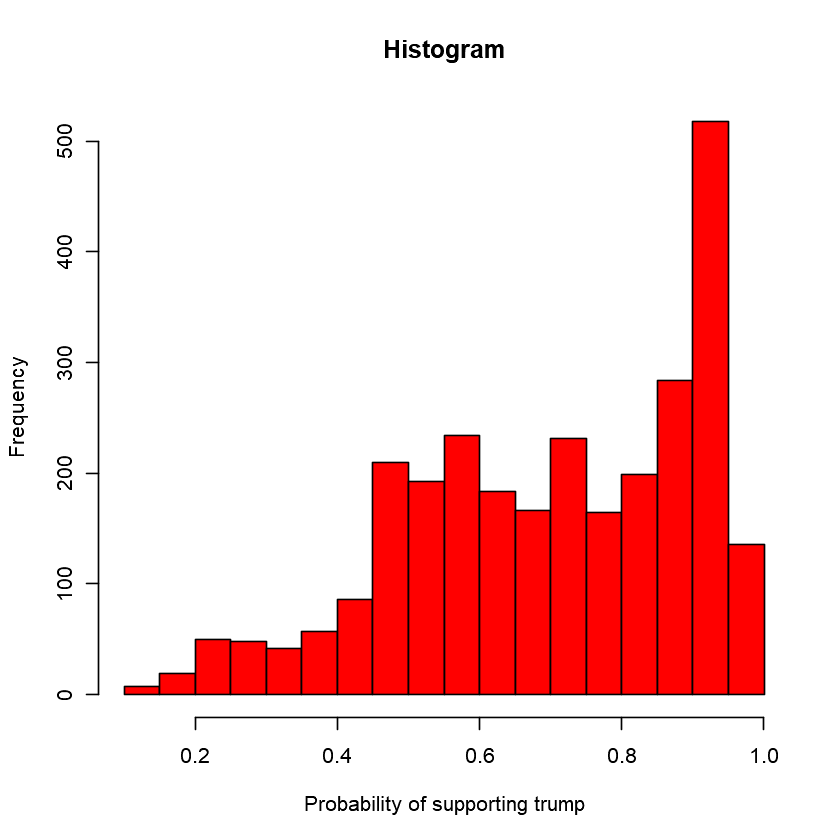

In [30]:
hist(LR_Model2$fitted.values,main = " Histogram ",xlab = "Probability of supporting trump", col = 'red')

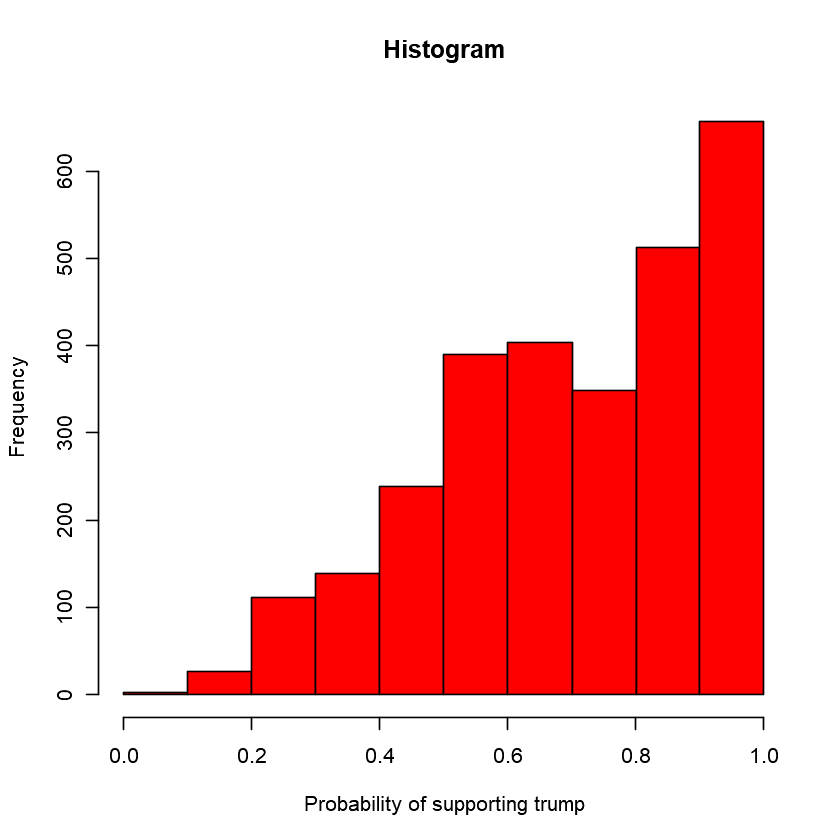

In [69]:
hist(LR_Model1$fitted.values,main = " Histogram ",xlab = "Probability of supporting trump", col = 'red')

In [70]:
LR_Model1$aic

[1] 2921.264

In [31]:
LR_Model2$aic

[1] 2900.06

In [34]:
elec_df$Predict <- ifelse(LR_Model1$fitted.values >0.5,"Votes Trump","Does Not votes Trump")

In [35]:
elec_df$Predict2 <- ifelse(LR_Model2$fitted.values >0.5,"Votes Trump","Does Not votes Trump")

In [39]:
# Confusion matrix

mytable <- table(elec_df$Support_Trump,elec_df$Predict)
rownames(mytable) <- c("Obseved Negative","Observed Positive")
colnames(mytable) <- c("Predicted Negative","Predicted Positive")
mytable

                   
                    Predicted Negative Predicted Positive
  Obseved Negative                 321                524
  Observed Positive                197               1787

In [40]:
# Confusion matrix

mytable2 <- table(elec_df$Support_Trump,elec_df$Predict2)
rownames(mytable2) <- c("Obseved Negative","Observed Positive")
colnames(mytable2) <- c("Predicted Negative","Predicted Positive")
mytable2

                   
                    Predicted Negative Predicted Positive
  Obseved Negative                 319                526
  Observed Positive                200               1784

In [73]:
efficiency <- sum(diag(mytable))/sum(mytable)
efficiency

[1] 0.7458466

In [41]:
efficiency2 <- sum(diag(mytable2))/sum(mytable2)
efficiency2

[1] 0.7433722

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.formula(formula = Support_Trump ~ LR_Model1$fitted.values,     data = elec_df, plot = TRUE, main = "ROC CURVE", col = "blue")

Data: LR_Model1$fitted.values in 845 controls (Support_Trump 0) < 1984 cases (Support_Trump 1).
Area under the curve: 0.7837

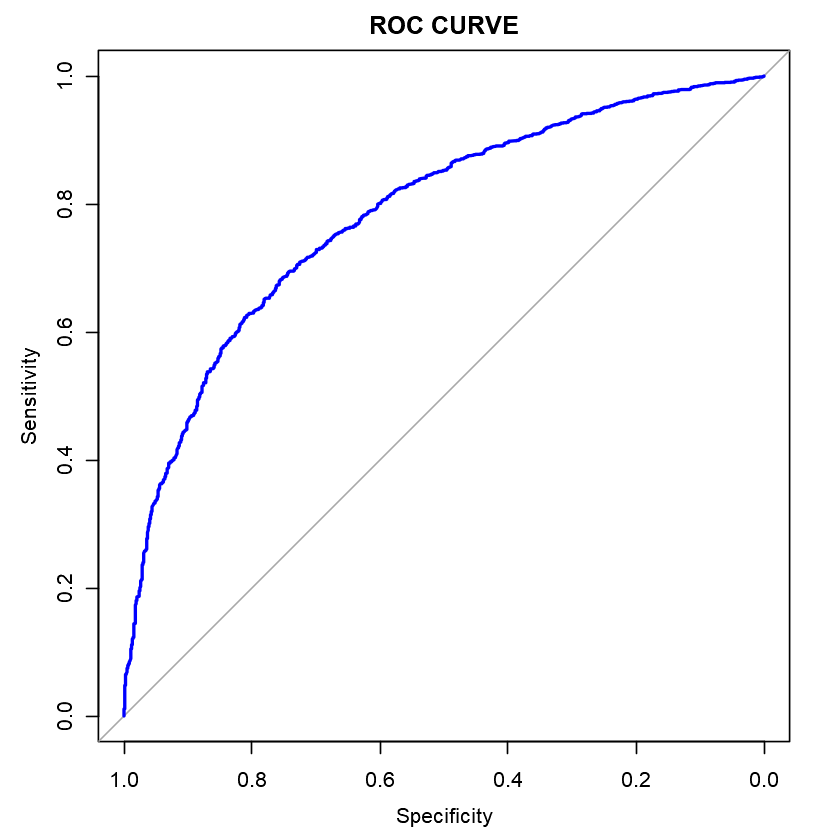

In [74]:
roc(Support_Trump~LR_Model1$fitted.values, data = elec_df, plot = TRUE, main = "ROC CURVE", col= "blue")

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.formula(formula = Support_Trump ~ LR_Model2$fitted.values,     data = elec_df, plot = TRUE, main = "ROC CURVE", col = "blue")

Data: LR_Model2$fitted.values in 845 controls (Support_Trump 0) < 1984 cases (Support_Trump 1).
Area under the curve: 0.775

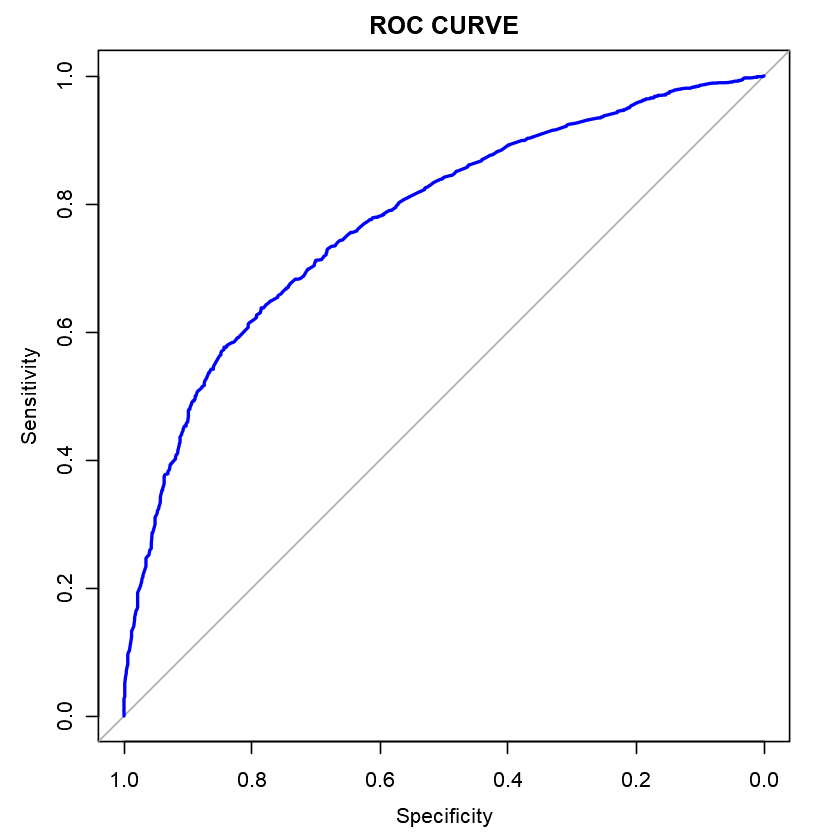

In [42]:
roc(Support_Trump~LR_Model2$fitted.values, data = elec_df, plot = TRUE, main = "ROC CURVE", col= "blue")

In [75]:
auc(Support_Trump~LR_Model1$fitted.values, data = elec_df)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.7837

In [43]:
auc(Support_Trump~LR_Model2$fitted.values, data = elec_df)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.775

In [76]:
hsl <- hoslem.test(elec_df$Support_Trump, fitted(LR_Model1), g = 10)

Warning message in Ops.factor(1, y):
"'-' not meaningful for factors"


In [44]:
hsl2 <- hoslem.test(elec_df$Support_Trump, fitted(LR_Model2), g = 10)
hsl2

Warning message in Ops.factor(1, y):
"'-' not meaningful for factors"



	Hosmer and Lemeshow goodness of fit (GOF) test

data:  elec_df$Support_Trump, fitted(LR_Model2)
X-squared = 2829, df = 8, p-value < 2.2e-16


In [77]:
hsl


	Hosmer and Lemeshow goodness of fit (GOF) test

data:  elec_df$Support_Trump, fitted(LR_Model1)
X-squared = 2829, df = 8, p-value < 2.2e-16


In [78]:
chisq <- anova(LR_Model1,test='Chisq')
chisq

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,2828,3449.977,NA
Age_Category,3,11.283779,2825,3438.693,1.028630e-02
Sex,1,26.895223,2824,3411.798,2.147891e-07
Education_Category,5,24.290796,2819,3387.507,1.908822e-04
Race_Ethinicity,3,175.469018,2816,3212.038,8.392307e-38
Religion,11,96.163660,2805,3115.875,1.023482e-15
Party,2,231.539406,2803,2884.335,5.270560e-51
Marital_status,5,8.012027,2798,2876.323,1.555740e-01
Internet_frequency,5,1.728648,2793,2874.595,8.852711e-01


In [45]:
chisq <- anova(LR_Model2,test='Chisq')
chisq

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,2828,3449.977,NA
Sex,1,27.127561,2827,3422.850,1.904631e-07
Education_Category,5,23.375381,2822,3399.474,2.861048e-04
Party,2,403.946779,2820,2995.527,1.923409e-88
Income_Recode,2,9.686485,2818,2985.841,7.881457e-03
Combining_Race,4,80.375746,2814,2905.465,1.450100e-16
Ideology,4,43.405553,2810,2862.060,8.524774e-09


In [92]:
PseudoR2(LR_Model1, which = "CoxSnell")
PseudoR2(LR_Model1, which = "Nagelkerke")

CoxSnell 
0.1970081

Nagelkerke 
 0.2795935

In [46]:
PseudoR2(LR_Model2, which = "CoxSnell")
PseudoR2(LR_Model2, which = "Nagelkerke")

CoxSnell 
0.1876452

Nagelkerke 
 0.2663057

In [84]:
PseudoR2(LR_Model1, which = "Nagelkerke")

Nagelkerke 
 0.2795935

In [93]:
regTermTest(LR_Model1, ~ Age_Category + Sex + Education_Category + 
    Race_Ethinicity + Religion + Party + Marital_status + Internet_frequency + 
    Income_Recode + Combining_Race + Ideology: Support_Trump  , null=NULL)


Wald test for Age_Category Sex Education_Category Race_Ethinicity Religion Party Marital_status Internet_frequency Income_Recode Combining_Race Ideology:Support_Trump
 in glm(formula = Support_Trump ~ Age_Category + Sex + Education_Category + 
    Race_Ethinicity + Religion + Party + Marital_status + Internet_frequency + 
    Income_Recode + Combining_Race + Ideology, family = binomial(link = "logit"), 
    data = elec_df)
F =  6.918718  on  41  and  2783  df: p= < 2.22e-16 

In [47]:
regTermTest(LR_Model2, ~ Sex + Education_Category + Party + 
    Income_Recode + Combining_Race + Ideology: Support_Trump, null=NULL)

Wald test for Sex Education_Category Party Income_Recode Combining_Race Ideology:Support_Trump
 in glm(formula = Support_Trump ~ Sex + Education_Category + Party + 
    Income_Recode + Combining_Race + Ideology, family = binomial(link = "logit"), 
    data = elec_df)
F =  18.60938  on  14  and  2810  df: p= < 2.22e-16 

                          Sex Female Male
Support_Trump Party                      
0             Democrat           319  204
              Independent        117  124
              Republican          44   37
1             Democrat           281  239
              Independent        236  397
              Republican         398  433

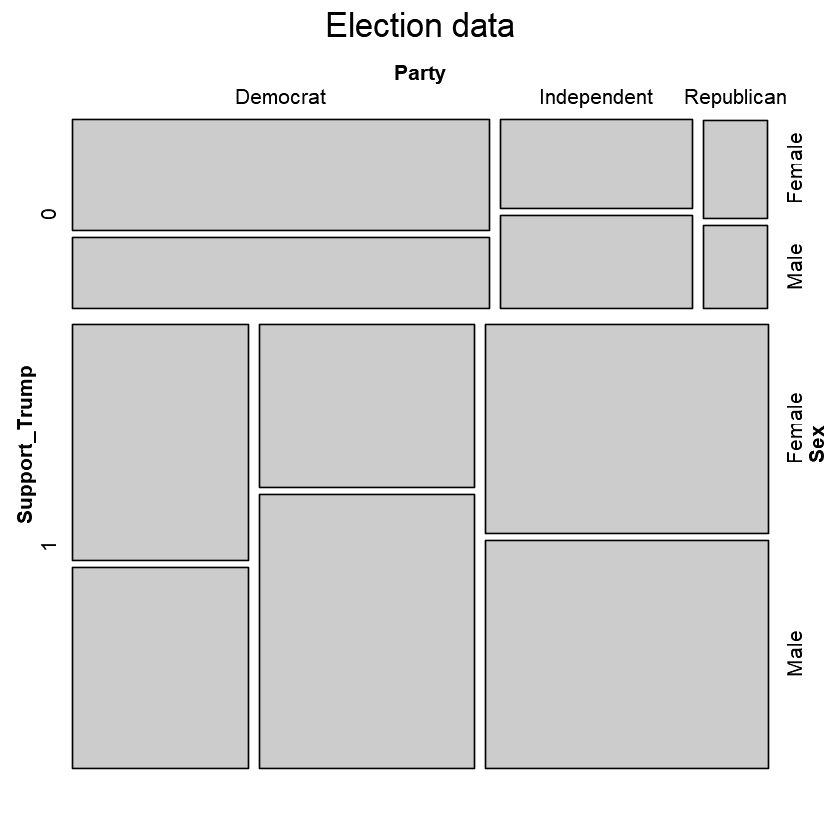

In [56]:
tbl <- xtabs(~Support_Trump + Party	+ Sex , elec_df)
ftable(tbl)
mosaic(tbl, main = "Election data")

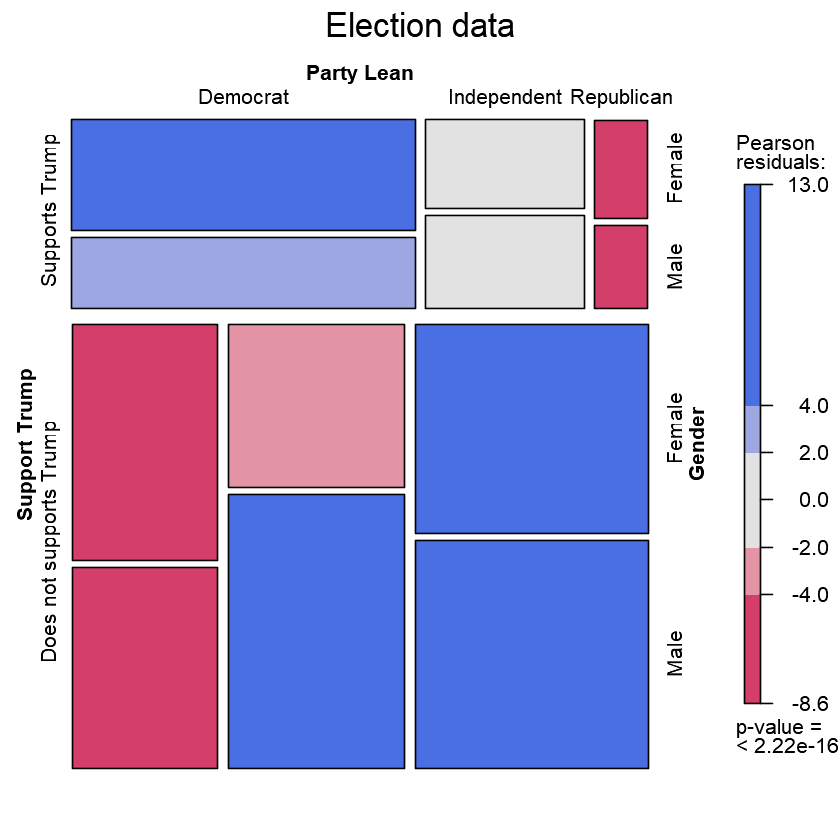

In [57]:
mosaic(tbl, 
       shade = TRUE,
       legend = TRUE,
       labeling_args = list(set_varnames = c(Sex = "Gender",
                                             Support_Trump = "Support Trump",
                                             Party = "Party Lean")),
       set_labels = list(Support_Trump= c("Supports Trump", "Does not supports Trump"),
                         Sex = c("Female", "Male")),
       main = "Election data")